# Predicting Spending Based on Length of Stay and Other Attributes 

Tourism is a vital sector for many economies, and understanding the factors that influence tourist spending can help stakeholders make informed decisions. In this project, we aim to predict tourist spending based on attributes such as the purpose of visit, average length of stay, and other related factors.

The dataset contains information about tourists, including their purpose of visit (e.g., business, leisure, etc.), total tourists, and average length of stay. By leveraging this data, we will build machine learning models to analyze and predict spending patterns. These predictions can be valuable for policymakers, tourism boards, and businesses to optimize resources and tailor strategies for different tourist segments.

## - 1 Preprocess the Data (Rename and Convert Columns)

In [4]:
# Importing the libraries we need
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Reading the dataset into a pandas DataFrame to explore and process it
file_path = 'Dataset.csv'  # Replace this with your actual file path
data = pd.read_csv(file_path)

# Looking at the first few rows of the dataset to understand its structure
data.head()


,year,Month,Religious\n,Business\n,Leisure,Other\n,Visiting Friends& Relatives\n,Total\n,Tourists Spending\n,Average Length of Stay\n
0,2021,February,3,51,3,17,52,125,948,10.1
1,2021,March,2,67,6,24,49,148,582,10.0
2,2021,April,6,71,9,29,61,176,503,7.7
3,2021,May,7,64,12,35,67,185,801,7.9
4,2021,June,3,69,12,36,55,175,745,6.4


In [7]:
# Renaming the columns to make them more consistent and easier to work with
data.columns = [
    'Year',
    'Month',
    'Religious',
    'Business',
    'Leisure',
    'Other',
    'Visiting_Friends_Relatives',
    'Total_Tourists',
    'Tourist_Spending',
    'Avg_Length_Stay'
]

# Converting numerical columns to the correct data types and handling missing values
numerical_cols = ['Religious', 'Business', 'Leisure', 'Other',
                  'Visiting_Friends_Relatives', 'Total_Tourists', 'Avg_Length_Stay']
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Fixing the 'Tourist_Spending' column by removing commas and converting to float
# Ensuring 'Tourist_Spending' is treated as a string before replacing commas
data['Tourist_Spending'] = data['Tourist_Spending'].astype(str).str.replace(',', '')

# Converting 'Tourist_Spending' to float after removing commas
data['Tourist_Spending'] = pd.to_numeric(data['Tourist_Spending'], errors='coerce')

# Dropping rows with missing values to keep things simple
data.dropna(inplace=True)


# Dropping rows with missing values to keep things simple
data.dropna(inplace=True)

# Saving the processed dataset with cleaned data and renamed columns
processed_file_path = 'Processed_Dataset.csv'  # Specify the desired file name
data.to_csv(processed_file_path, index=False)

print(f"Processed dataset saved to {processed_file_path}")



Processed dataset saved to Processed_Dataset.csv


## 2- Define Features and Target, Split the Data

In [8]:
# Features are the inputs to the model, and the target is what we want to predict
X = data[['Religious', 'Business', 'Leisure', 'Other',
          'Visiting_Friends_Relatives', 'Avg_Length_Stay']]
y = data['Tourist_Spending']

# Splitting the data into training and testing sets to evaluate the model later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3-  Baseline Model (Linear Regression)

In [9]:
# Linear Regression is simple and serves as a benchmark for comparison
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Making predictions using the baseline model
y_pred_baseline = baseline_model.predict(X_test)

# Evaluating the baseline model to see how well it performs
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))


## 4- Random Forest Model

In [10]:
# Random Forest is a more advanced model that can capture complex patterns
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest to compare with the baseline
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))


## 5- Gradient Boosting Model

In [11]:
# Gradient Boosting is another advanced model that often performs well in regression tasks
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions with Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluating Gradient Boosting to see how it compares
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))


## 6- comparing models 

In [13]:
# Creating a table to summarize the performance of all models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [baseline_mae, rf_mae, gb_mae],
    'RMSE': [baseline_rmse, rf_rmse, gb_rmse]
})

# Printing the results for comparison
print("Model Evaluation Results:")
results


Model Evaluation Results:


,Model,MAE,RMSE
0,Linear Regression,2742.969896,3730.431090
1,Random Forest,494.823333,582.176717
2,Gradient Boosting,322.537268,361.066829


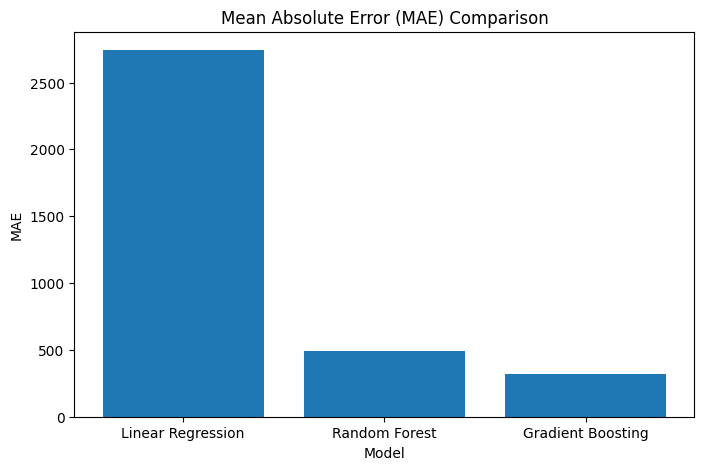

In [14]:
# Plotting MAE for all models
plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['MAE'])
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.show()


- Linear Regression:

This model has the highest MAE, indicating that its predictions are the least accurate among the three models. The error is over 2500 units on average, which suggests that Linear Regression is not capturing the relationships in the data effectively.

- Random Forest:

The MAE for this model is significantly lower, around 500 units. This improvement shows that Random Forest, a more advanced and non-linear model, performs much better at handling the complexities in the dataset.

- Gradient Boosting:

This model has the lowest MAE, making it the most accurate among the three. The MAE is slightly below 400 units, which suggests that Gradient Boosting captures patterns and nuances in the data better than the other models.

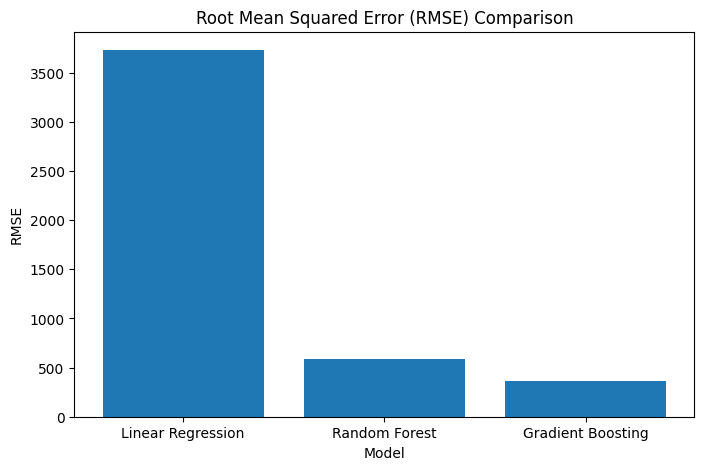

In [15]:
# Plotting RMSE for all models
plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['RMSE'])
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()


- Linear Regression:

The RMSE is the highest among all models, exceeding 3500 units.
RMSE penalizes larger errors more heavily compared to MAE. This result highlights that Linear Regression struggles significantly with large deviations in predictions, likely due to its inability to capture complex relationships in the data.

- Random Forest:

The RMSE for this model is much lower, around 600 units, showing that it is better at predicting tourist spending and handles non-linear patterns more effectively than Linear Regression.

- Gradient Boosting:

This model has the lowest RMSE, below 400 units, making it the most accurate model in this comparison. Gradient Boosting excels at learning from errors in the data iteratively, which explains its strong performance.

## 7- Choosing the model

Gradient Boosting was chosen as the final model  because:

- Best Performance: Gradient Boosting achieved the lowest error metrics (MAE and RMSE) among all models, indicating it makes the most accurate predictions.
- Handles Non-linear Relationships: Tourist spending likely depends on complex and non-linear relationships among attributes like purpose of visit and length of stay. Gradient Boosting is designed to capture such patterns effectively.
- 
- Robustness: Gradient Boosting builds models iteratively, learning from errors in previous predictions, making it robust and adaptable to different datasets.

In [17]:
import joblib

# Save the Gradient Boosting model to a file
model_file = 'gradient_boosting_model.pkl'
joblib.dump(gb_model, model_file)

print(f"Model saved as {model_file}")


Model saved as gradient_boosting_model.pkl
